In [10]:
using DifferentialEquations, DiffEqProblemLibrary, Plots, Rsvg
gr()

Plots.GRBackend()

# Plot solutions by each method

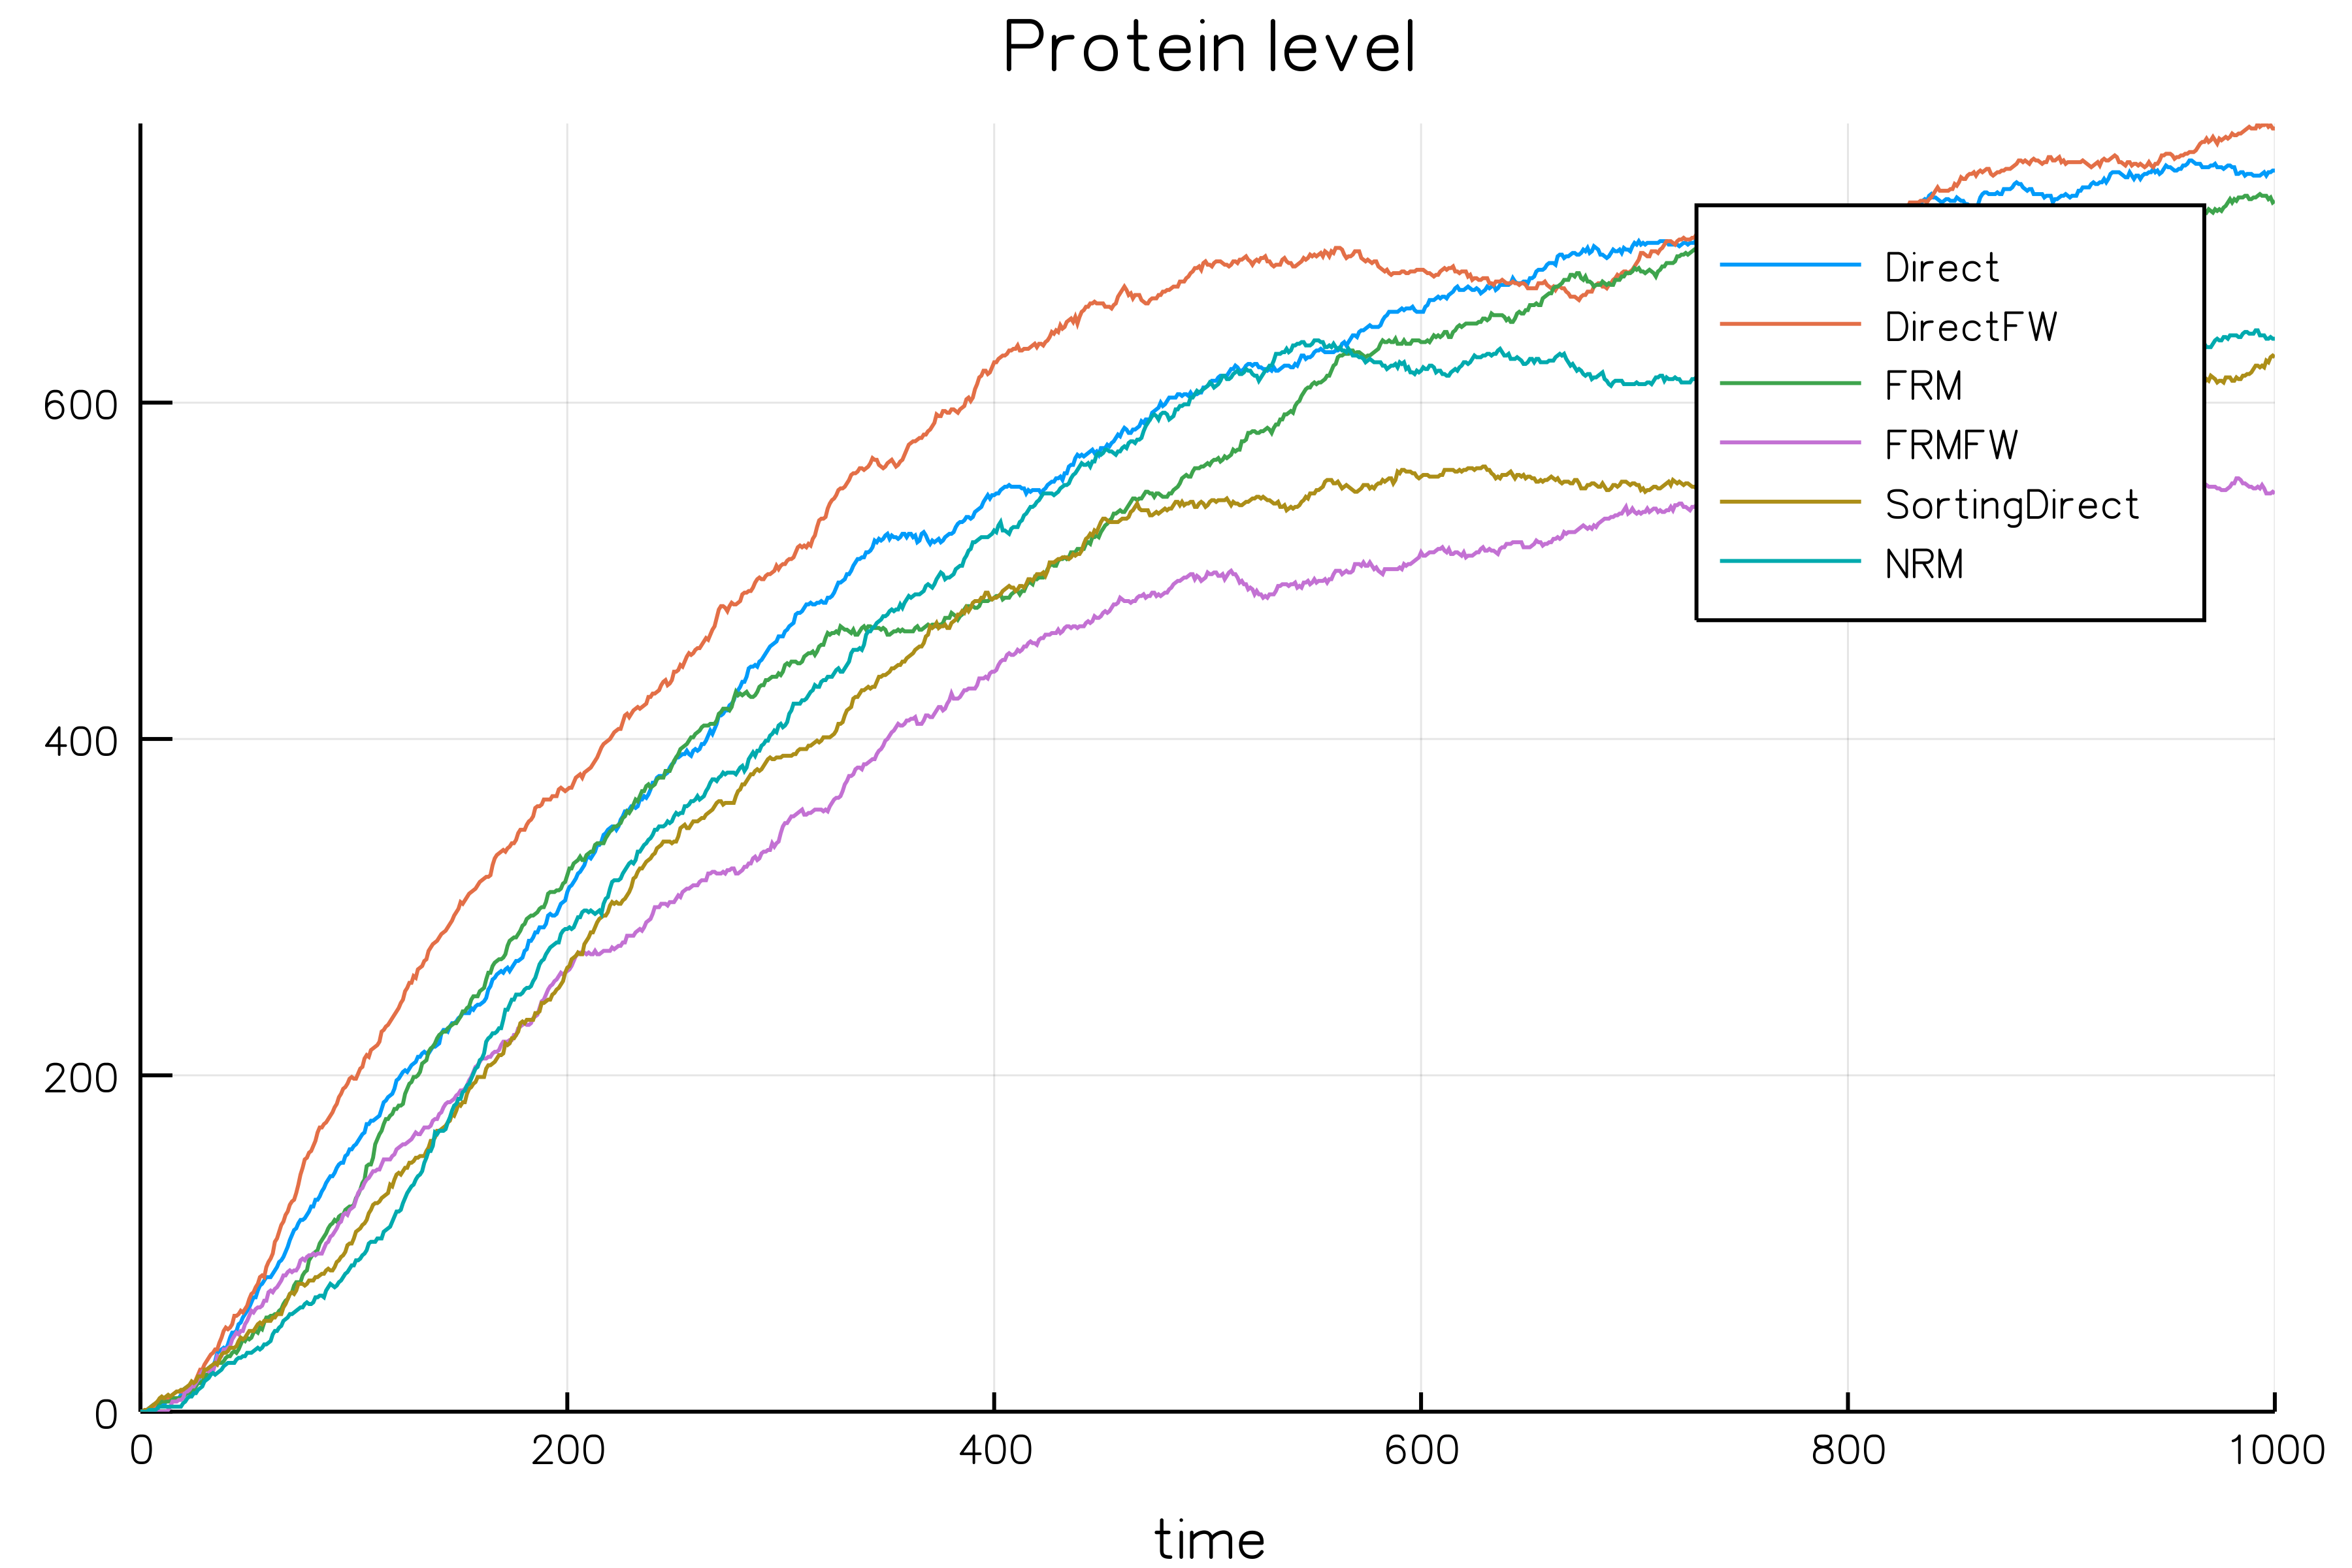

In [21]:
methods = (Direct(),DirectFW(),FRM(),FRMFW(),SortingDirect(),NRM())
legs    = [typeof(method) for method in methods]
shortlabels = [string(leg)[12:end] for leg in legs]
fmt     = :png
prob    = prob_jump_dnarepressor.discrete_prob
tf      = prob_jump_dnarepressor.tstop
rn      = prob_jump_dnarepressor.network
ploth   = plot(reuse=false)
for (i,method) in enumerate(methods)
    jump_prob = JumpProblem(prob, method, rn, save_positions=(false,false))
    sol = solve(jump_prob, SSAStepper(), saveat=tf/1000.)
    plot!(ploth,sol.t,sol[3,:],label=shortlabels[i], format=fmt)
end
plot(ploth, title="Protein level", xlabel="time",format=fmt)

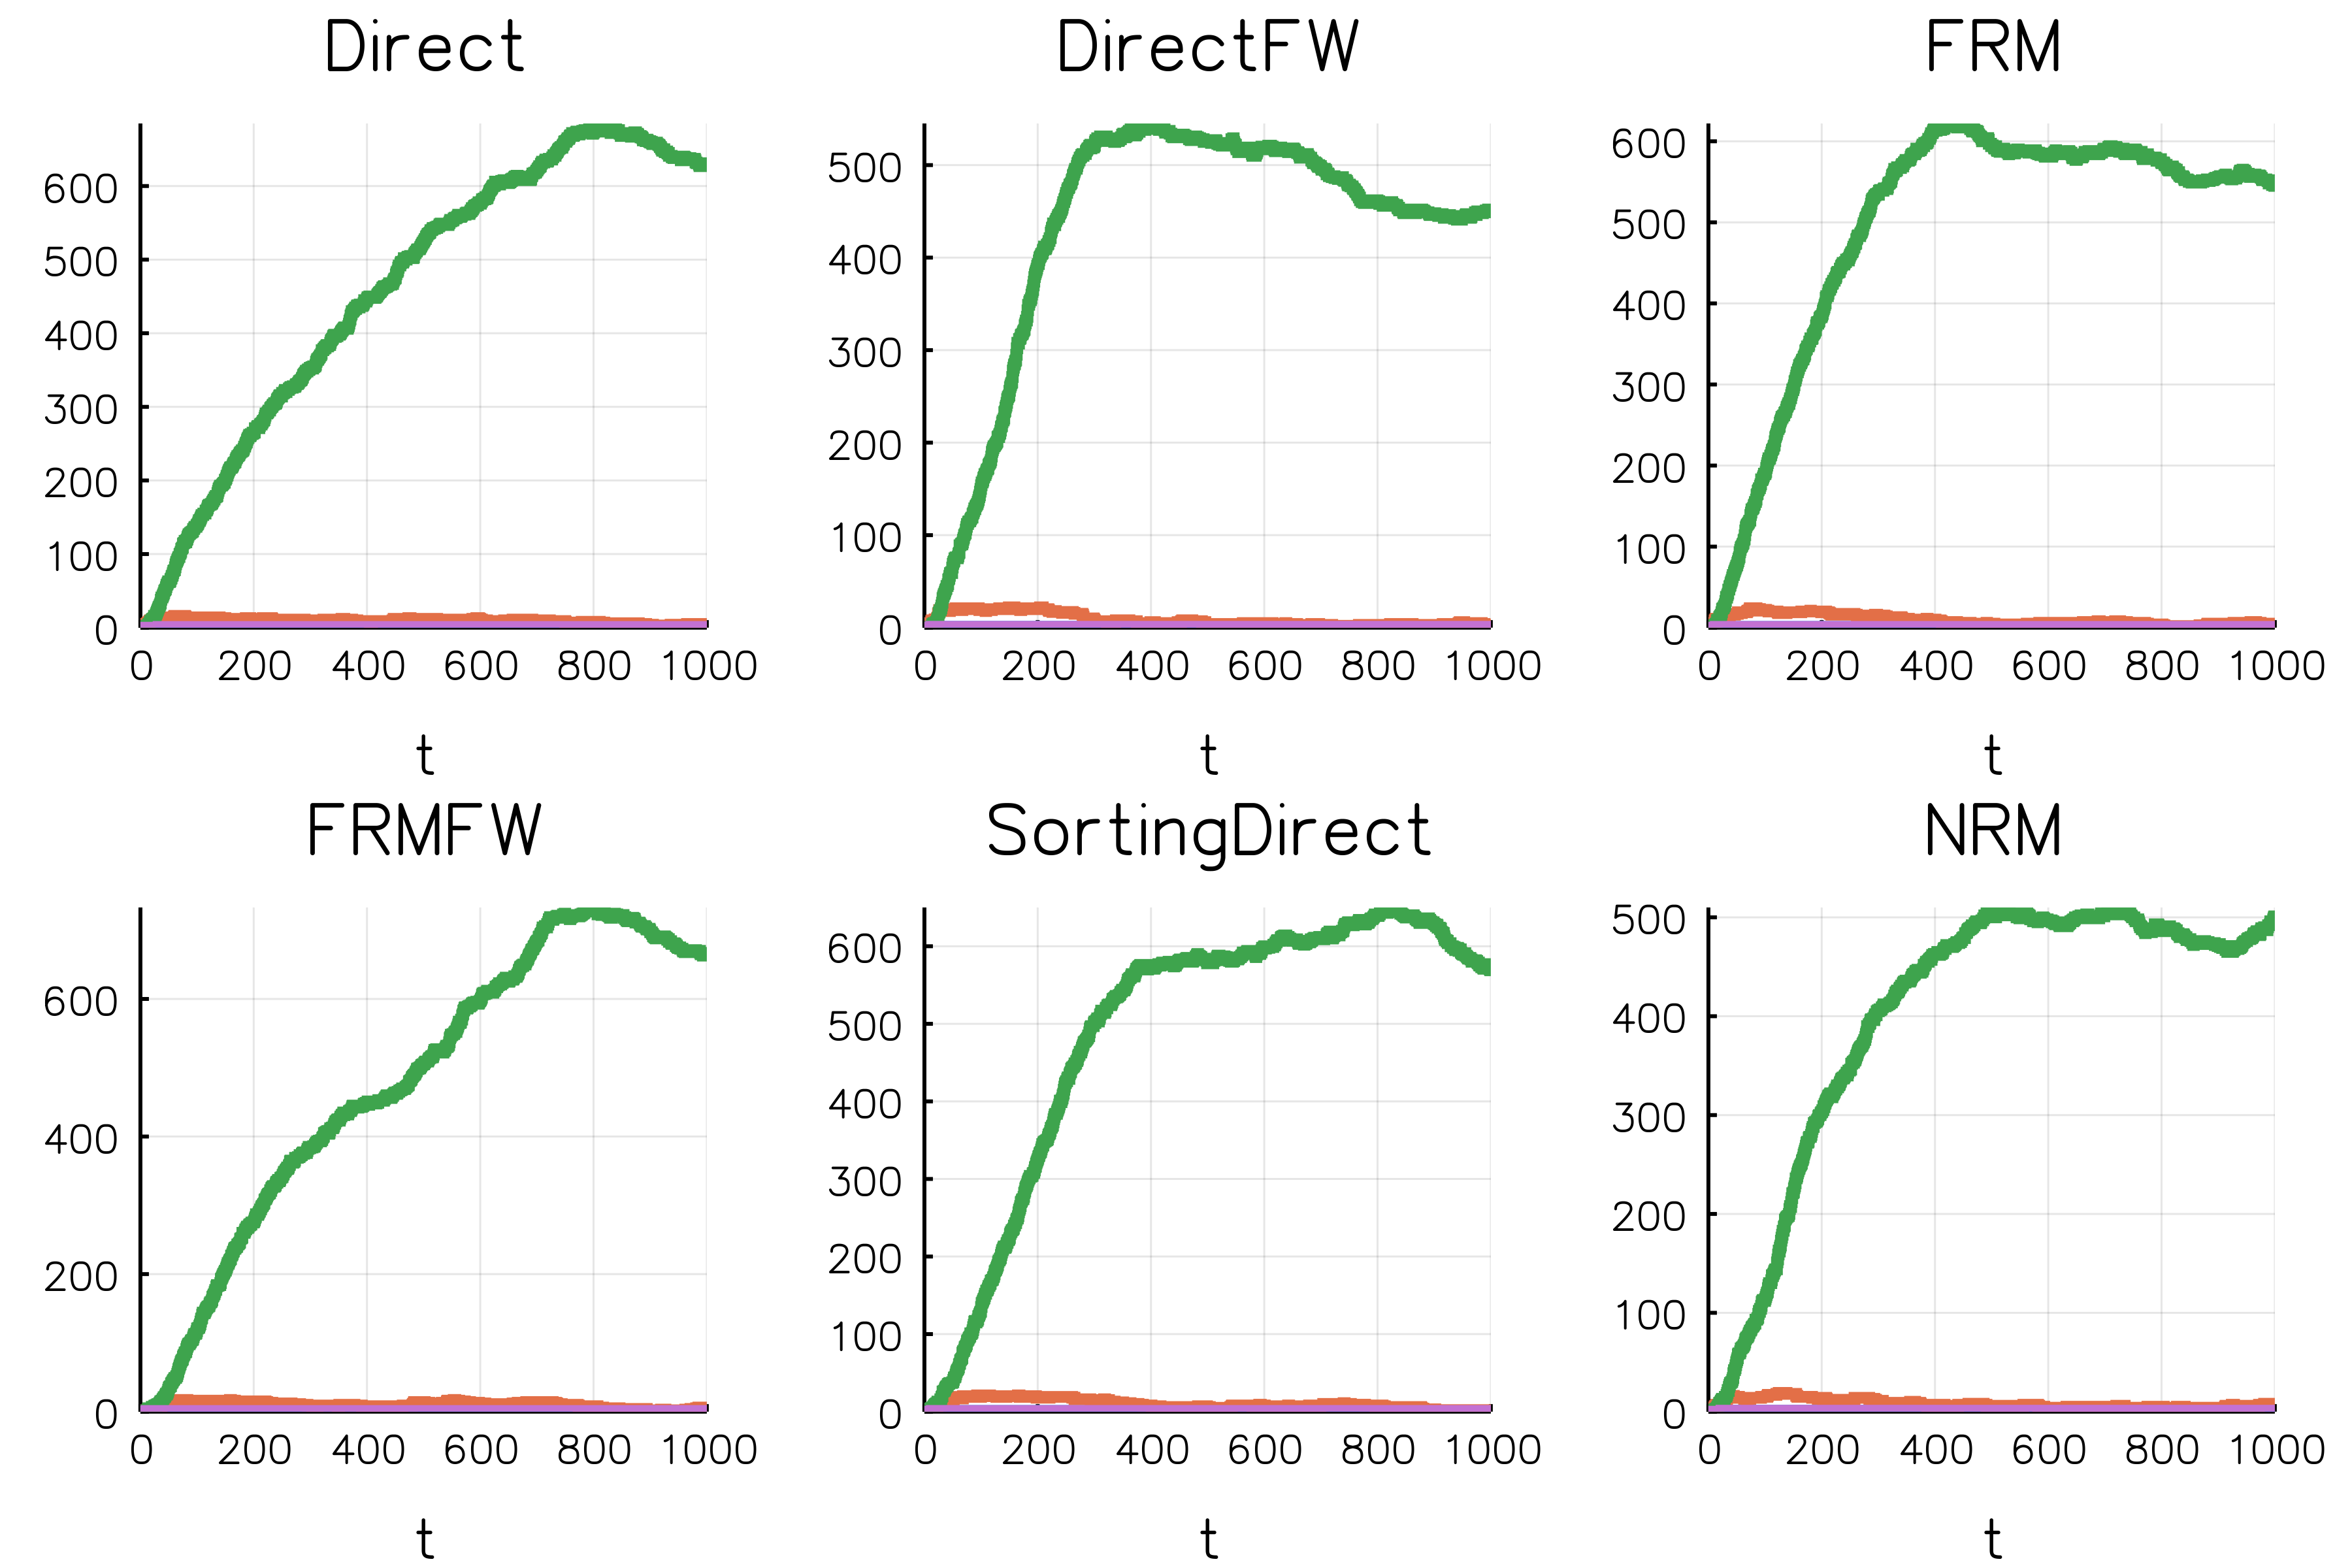

In [22]:
p = []
for (i,method) in enumerate(methods)
    jump_prob = JumpProblem(prob, method, rn, save_positions=(false,false))
    sol = solve(jump_prob, SSAStepper(), saveat=tf/1000.)
    push!(p, plot(sol,title=shortlabels[i],leg=false,format=fmt))
end
plot(p...,format=fmt)

# Benchmarking performance of the methods

In [23]:
using BenchmarkTools
benchmarks = []
# turn off saving solution
for method in methods
    jump_prob = JumpProblem(prob, method, rn, save_positions=(false,false))
    sol = solve(jump_prob, SSAStepper())
    push!(benchmarks, @benchmark solve($jump_prob, $SSAStepper()))
end

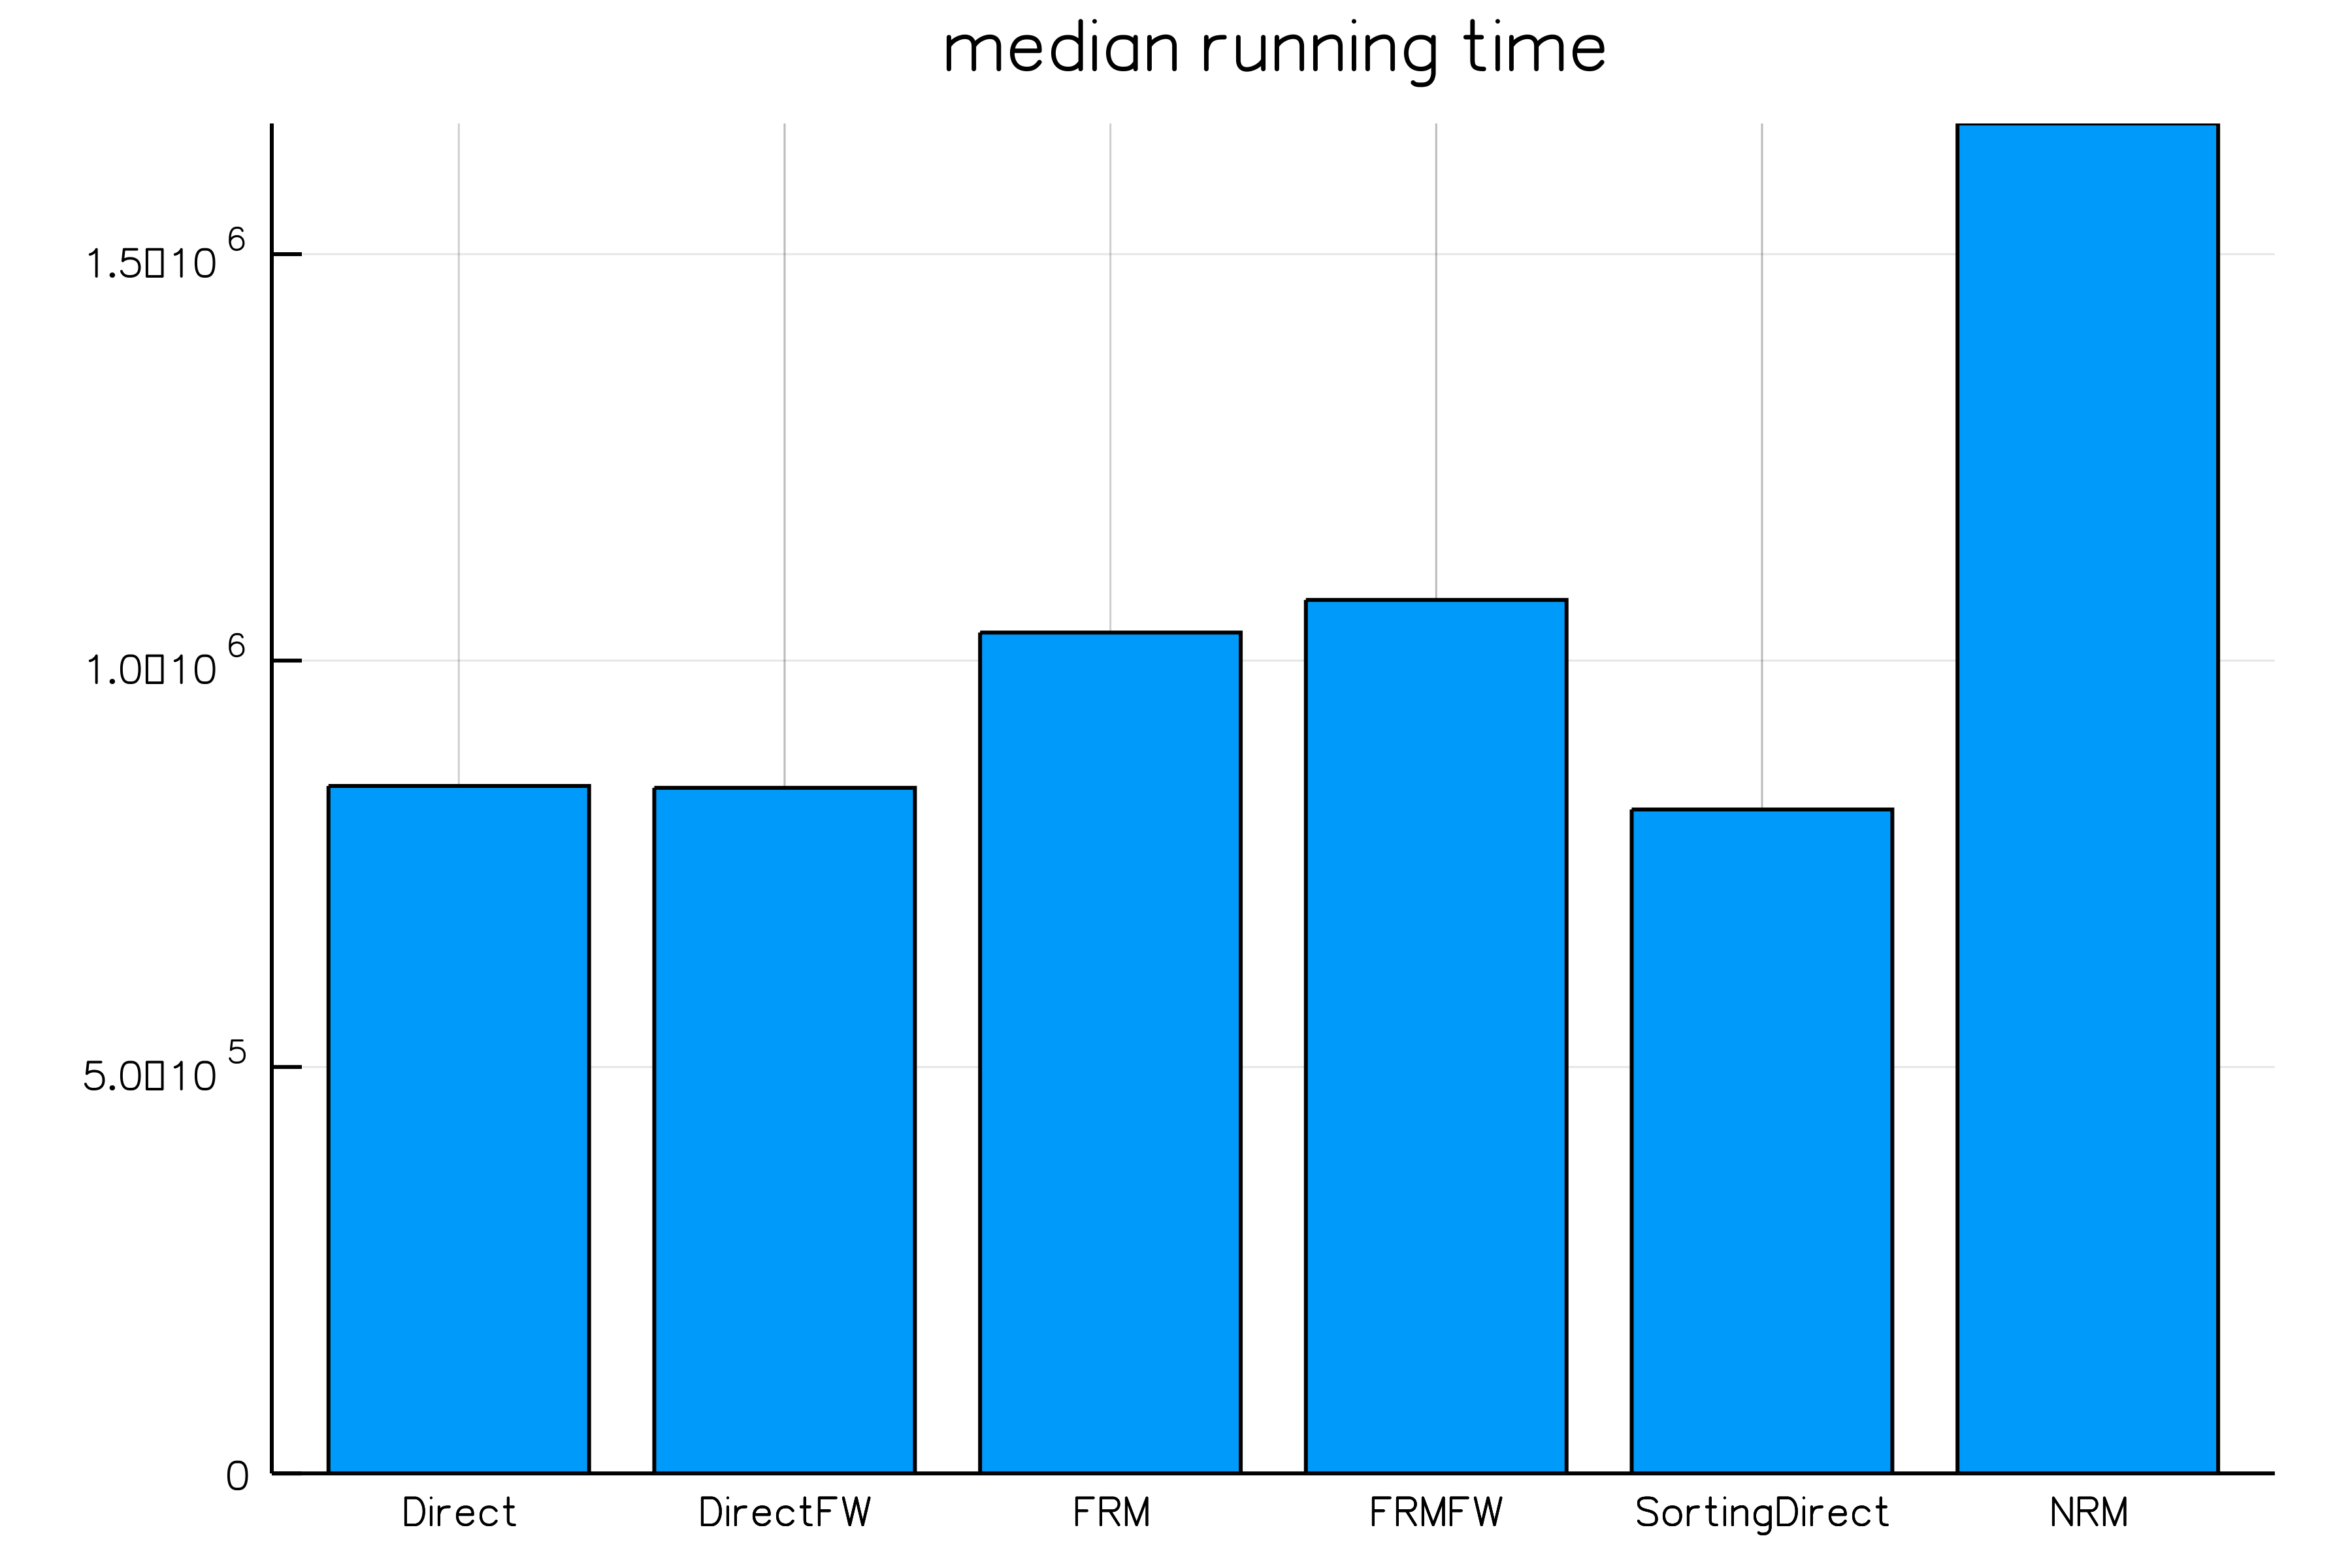

In [24]:
medtimes = [median(b.times) for b in benchmarks]
bar(shortlabels,medtimes,title="median running time",leg=false,format=fmt)

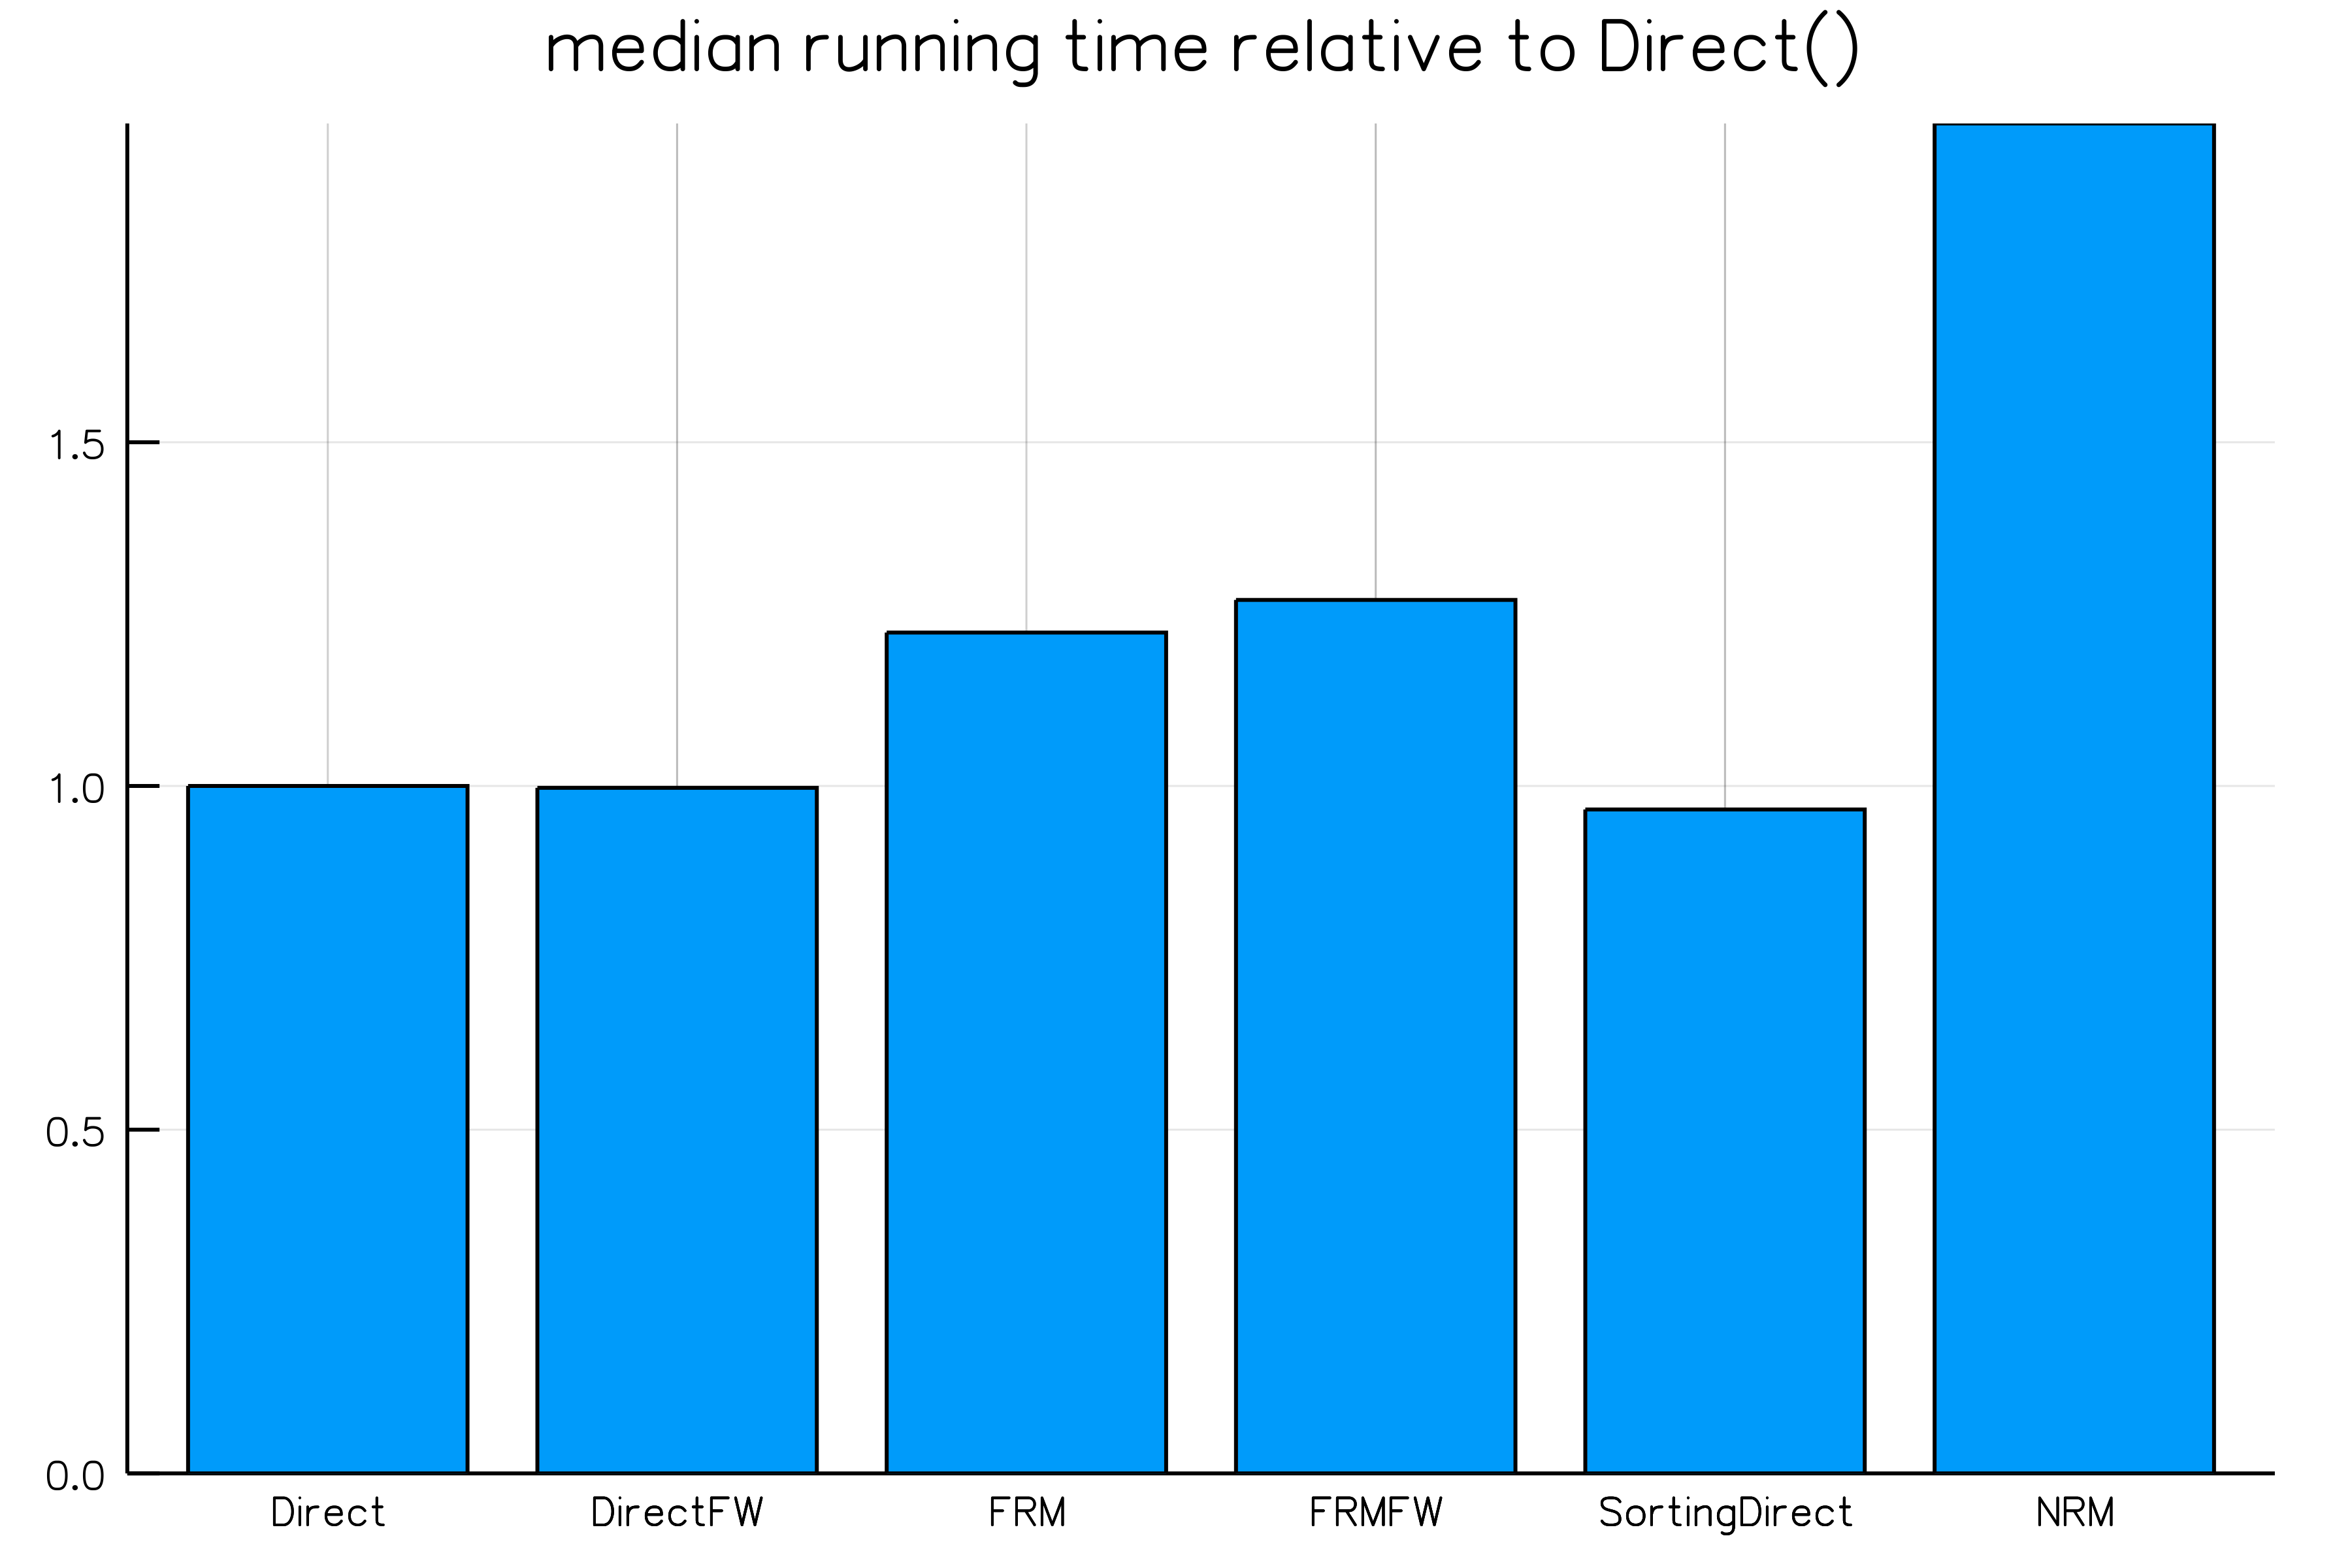

In [25]:
relmed = medtimes / medtimes[1]
bar(shortlabels,relmed,title="median running time relative to Direct()",leg=false,format=fmt)

In [37]:
using DataFrames
# convert times to units of ms
df = DataFrame(names=shortlabels,medtimes=(medtimes/1e6),relmedtimes=relmed)

,names,medtimes,relmedtimes
1,Direct,0.845738,1.0
2,DirectFW,0.843456,0.997301
3,FRM,1.03448,1.22317
4,FRMFW,1.07461,1.27061
5,SortingDirect,0.816822,0.96581
6,NRM,1.6608,1.96373
